<a href="https://colab.research.google.com/github/misbah221790/Final-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***FINAL PROJECT***
# ***ANNUAL_TEMP.CSV DATASET FILE***
# ***SEPERATE TWO COMPANIES DATASET***


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



In [ ]:
# Load the dataset
data = pd.read_csv('/content/annual_temp.csv')


In [ ]:
# Encode the target variable
label_encoder = LabelEncoder()
data['Source_encoded'] = label_encoder.fit_transform(data['Source'])


In [ ]:
# Features and target
X = data[['Year', 'Mean']]
y = data['Source_encoded']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_)


In [ ]:
# Print the results
print(f'Accuracy: {accuracy_rf}')
print(f'Classification Report:\n{classification_rep_rf}')


Accuracy: 0.36363636363636365
Classification Report:
              precision    recall  f1-score   support

        GCAG       0.38      0.34      0.36        29
     GISTEMP       0.34      0.38      0.36        26

    accuracy                           0.36        55
   macro avg       0.36      0.36      0.36        55
weighted avg       0.37      0.36      0.36        55



In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/annual_temp.csv')

In [ ]:
# Filter the data for each company
data_gcag = data[data['Source'] == 'GCAG']
data_gistemp = data[data['Source'] == 'GISTEMP']


In [ ]:
# Save the filtered data to separate CSV files
gcag_file_path = 'GCAG_Dataset.csv'
gistemp_file_path = 'GISTEMP_Dataset.csv'

data_gcag.to_csv(gcag_file_path, index=False)
data_gistemp.to_csv(gistemp_file_path, index=False)


In [ ]:
print(f"GCAG data saved to {gcag_file_path}")
print(f"GISTEMP data saved to {gistemp_file_path}")


GCAG data saved to GCAG_Dataset.csv
GISTEMP data saved to GISTEMP_Dataset.csv


# ***TASK***
# ***DATA PREPROCESSING OF ANNUAL_TEMP.CSV DATASET FILE***

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
# Load the dataset
data = pd.read_csv('/content/annual_temp.csv')

In [ ]:

print("First few rows of the dataset:")
print(data.head())


First few rows of the dataset:
    Source  Year    Mean
0     GCAG  2015  0.8990
1  GISTEMP  2015  0.8700
2     GCAG  2014  0.7402
3  GISTEMP  2014  0.7500
4     GCAG  2013  0.6687


In [ ]:
print("\nSummary of the dataset:")
print(data.info())


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Source  272 non-null    object 
 1   Year    272 non-null    int64  
 2   Mean    272 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.5+ KB
None


In [ ]:
# Handle missing values (if any)
data.dropna(inplace=True)

In [ ]:
# Encode the categorical variable 'Source'
label_encoder = LabelEncoder()
data['Source_encoded'] = label_encoder.fit_transform(data['Source'])

In [ ]:
# Separate features and target variable
X = data[['Year', 'Mean']]
y = data['Source_encoded']


In [ ]:
# Normalize/scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Create DataFrames for training and testing data
train_data = pd.DataFrame(X_train, columns=['Year', 'Mean'])
train_data['Source_encoded'] = y_train.reset_index(drop=True)
test_data = pd.DataFrame(X_test, columns=['Year', 'Mean'])
test_data['Source_encoded'] = y_test.reset_index(drop=True)


In [ ]:
# Display the shapes of the training and testing sets
print("Shapes of the training and testing sets:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Shapes of the training and testing sets:
X_train: (217, 2), X_test: (55, 2)
y_train: (217,), y_test: (55,)


In [ ]:
# Display the preprocessed training and testing datasets
print("\nPreprocessed Training Data:")
print(train_data.head())
print("\nPreprocessed Testing Data:")
print(test_data.head())


Preprocessed Training Data:
       Year      Mean  Source_encoded
0  1.311809  1.251842               1
1 -0.624065 -0.789841               0
2 -0.089152  0.849989               0
3 -0.776897 -1.380102               1
4  1.260865  1.444423               1

Preprocessed Testing Data:
       Year      Mean  Source_encoded
0  1.337281  1.269495               0
1  0.241984  0.076454               0
2  0.725953 -0.481390               1
3  0.114624 -0.064130               1
4 -0.776897 -1.121080               0


# ***LINEAR REGRESSION THROUGH  ANNUAL_TEMP.CSV***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the dataset
data = pd.read_csv('/content/annual_temp.csv')


In [ ]:
# Encode the categorical variable 'Source'
label_encoder = LabelEncoder()
data['Source_encoded'] = label_encoder.fit_transform(data['Source'])

In [ ]:
# Separate features and target variable
X = data[['Year', 'Source_encoded']]
y = data['Mean'].astype(float)  # Convert target variable to float

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(y_pred)

[ 0.41132188  0.11437355  0.22018514  0.05444653 -0.16185746  0.01991766
 -0.22869025  0.33758331 -0.03064773 -0.35989998 -0.13891517 -0.4358635
 -0.29084223  0.23177172 -0.0767632  -0.15495169 -0.26544409  0.01078692
  0.1558082   0.30773525 -0.2701249  -0.42895773  0.35607568  0.36988723
 -0.14582095  0.46188727  0.43894498 -0.19416137  0.11659851  0.4320392
  0.10278696  0.28011215  0.01769269 -0.25853831 -0.35521917  0.49419118
  0.100562    0.26161979  0.08206963  0.10746777  0.40664107  0.06135231
 -0.32759607  0.42735839  0.22709091 -0.23091521  0.20414862 -0.20329211
  0.17184471 -0.10661126  0.44116994 -0.00993041 -0.28616141 -0.34831339
  0.09588118]


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)


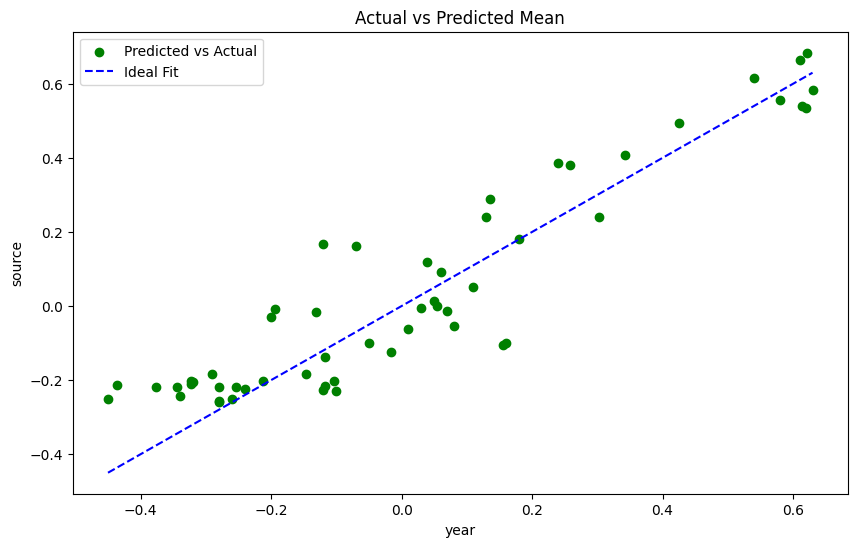

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, color='green', label='Predicted vs Actual')
# Plot the line y = x for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--', label='Ideal Fit')
plt.xlabel('year')
plt.ylabel('source')
plt.title('Actual vs Predicted Mean')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.7284925099123414


# ***POLYNOMIAL REGRESSION THROUGH ANNUAL_TEMP.CSV DATASET***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the dataset
data = pd.read_csv('/content/annual_temp.csv')


In [ ]:
# Encode the categorical variable 'Source'
label_encoder = LabelEncoder()
data['Source_encoded'] = label_encoder.fit_transform(data['Source'])

In [ ]:
# Separate features and target variable
X = data[['Year', 'Source_encoded']]
y = data['Mean'].astype(float)  # Convert target variable to float


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Apply Polynomial Features
degree = 2
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
# Train the Polynomial Regression model
model = PolynomialFeatures()
model.fit(X_train_poly, y_train)

PolynomialFeatures()

In [ ]:
# Make predictions on the training and test sets
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)


In [ ]:
# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

In [ ]:
print(f"Training Mean Squared Error: {mse_train}")
print(f"Training R-squared: {r2_train}")
print(f"Testing Mean Squared Error: {mse_test}")
print(f"Testing R-squared: {r2_test}")

Training Mean Squared Error: 0.012713289227292417
Training R-squared: 0.8706891666724843
Testing Mean Squared Error: 0.013998140255651617
Testing R-squared: 0.8472615032951085


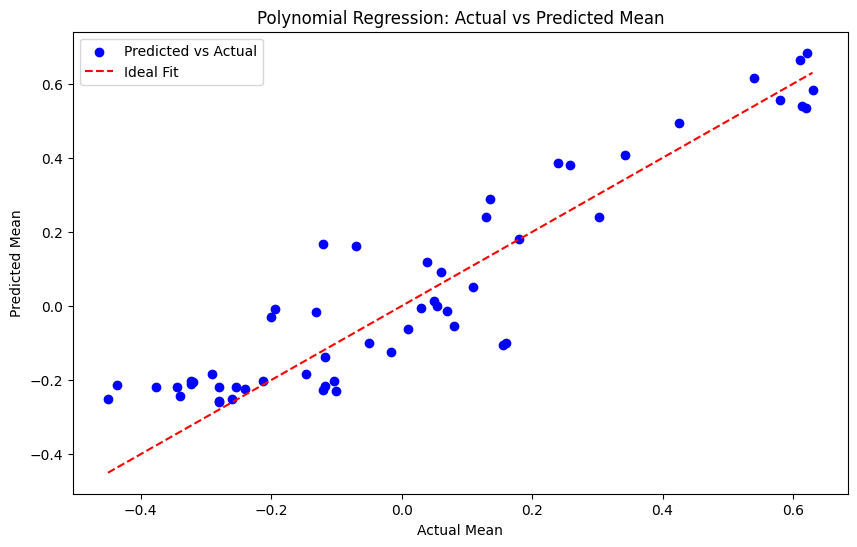

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))

# Plot actual vs predicted values for the test set
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')

# Plot the line y = x for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')

plt.xlabel('Actual Mean')
plt.ylabel('Predicted Mean')
plt.title('Polynomial Regression: Actual vs Predicted Mean')
plt.legend()
plt.show()

# ***RANDOM FOREST THROUGH ANNUAL_TEMP.CSV DATASET***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the dataset
data = pd.read_csv('/content/annual_temp.csv')

In [ ]:
# Encode the categorical variable 'Source'
label_encoder = LabelEncoder()
data['Source_encoded'] = label_encoder.fit_transform(data['Source'])

In [ ]:
# Separate features and target variable
X = data[['Year', 'Source_encoded']]
y = data['Mean'].astype(float)  # Convert target variable to float

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train the Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.004023388378963627
R-squared: 0.9560994331075712


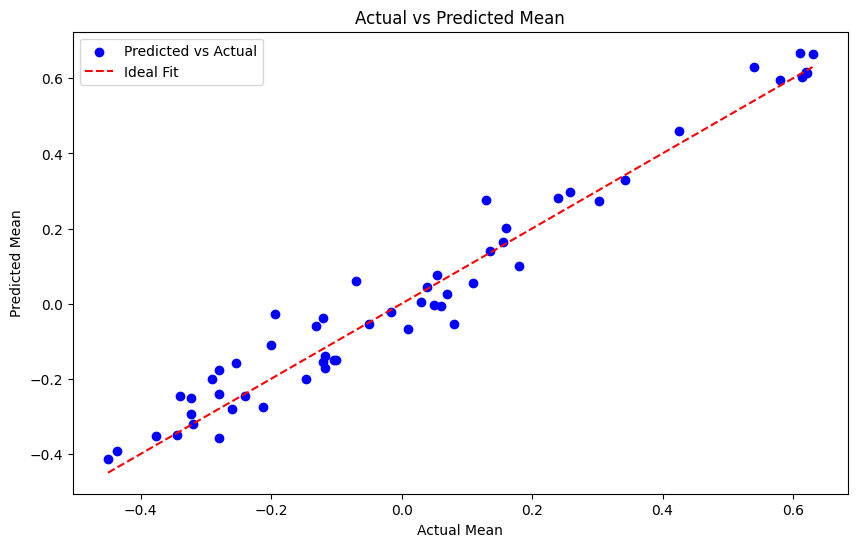

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

# Plot the line y = x for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')

plt.xlabel('Actual Mean')
plt.ylabel('Predicted Mean')
plt.title('Actual vs Predicted Mean')
plt.legend()
plt.show()

# ***DECISION TREE THROUGH ANNUAL_TEMP.CSV***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the dataset
data = pd.read_csv('/content/annual_temp.csv')


In [ ]:
# Encode the categorical variable 'Source'
label_encoder = LabelEncoder()
data['Source_encoded'] = label_encoder.fit_transform(data['Source'])

In [ ]:
# Separate features and target variable
X = data[['Year', 'Source_encoded']]
y = data['Mean'].astype(float)  # Convert target variable to float

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Make predictions on the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

In [ ]:
print(f"Training Mean Squared Error: {mse_train}")
print(f"Training R-squared: {r2_train}")
print(f"Testing Mean Squared Error: {mse_test}")
print(f"Testing R-squared: {r2_test}")

Training Mean Squared Error: 0.0
Training R-squared: 1.0
Testing Mean Squared Error: 0.0030772887272727287
Testing R-squared: 0.9664226500416169


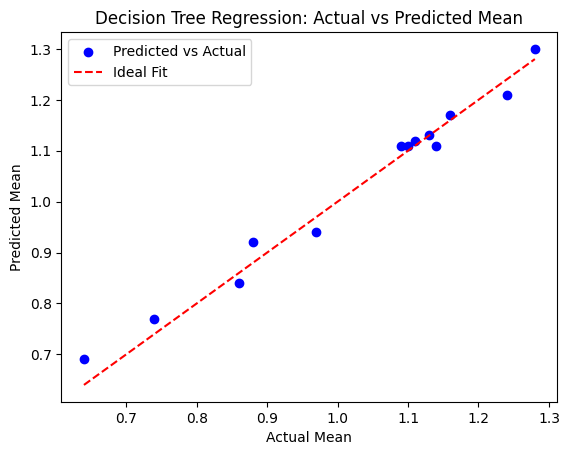

In [ ]:
# Plot actual vs predicted values for the test set
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')

# Plot the line y = x for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')

plt.xlabel('Actual Mean')
plt.ylabel('Predicted Mean')
plt.title('Decision Tree Regression: Actual vs Predicted Mean')
plt.legend()
plt.show()



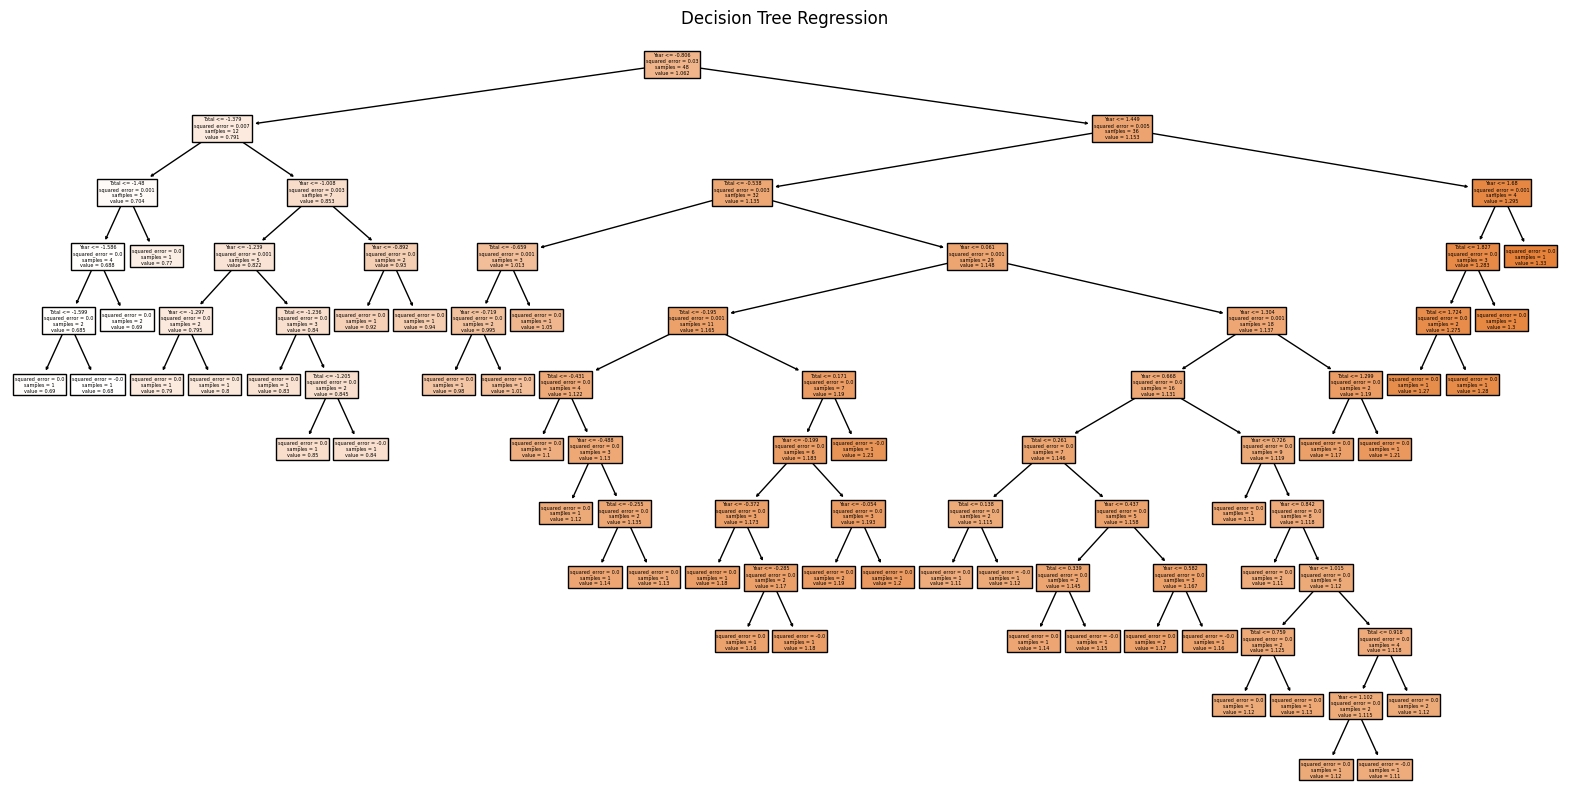

In [ ]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=features, filled=True)
plt.title('Decision Tree Regression')
plt.show()

# ***SVR***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the dataset
data = pd.read_csv('/content/annual_temp.csv')

In [ ]:
# Encode the categorical variable 'Source'
label_encoder = LabelEncoder()
data['Source_encoded'] = label_encoder.fit_transform(data['Source'])


In [ ]:
# Separate features and target variable
X = data[['Year', 'Source_encoded']]
y = data['Mean'].astype(float)  # Convert target variable to float


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
 #Standardize the features for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize and train the SVR model
model = SVR(kernel='rbf')
model.fit(X_train_scaled, y_train)

SVR()

In [ ]:
# Make predictions on the training and test sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

In [ ]:
print(f"Training Mean Squared Error: {mse_train}")
print(f"Training R-squared: {r2_train}")
print(f"Testing Mean Squared Error: {mse_test}")
print(f"Testing R-squared: {r2_test}")

Training Mean Squared Error: 0.010603516108533044
Training R-squared: 0.8921483276528774
Testing Mean Squared Error: 0.01186191145077635
Testing R-squared: 0.8705706265297182


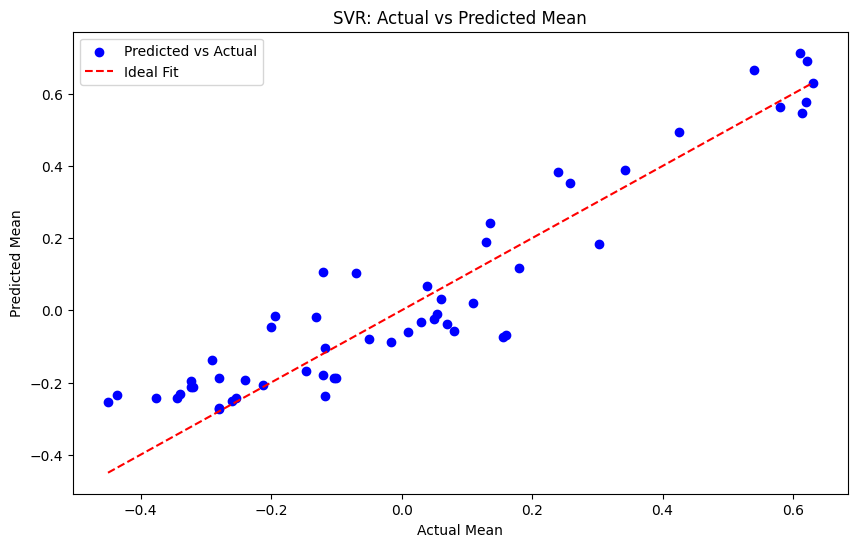

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))

# Plot actual vs predicted values for the test set
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')

# Plot the line y = x for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')

plt.xlabel('Actual Mean')
plt.ylabel('Predicted Mean')
plt.title('SVR: Actual vs Predicted Mean')
plt.legend()
plt.show()

# ***WHICH REGRESSION GIVES BEST PREDICTION***

Conclusion:

Based on the comparison of different regression models, the Random Forest Regression model provides the best predictions with the highest R² score and the lowest Mean Squared Error on the test set. This indicates that Random Forest Regression captures the variability in the data more effectively than the other models.

Reason:

Random Forest Regression is an ensemble method that combines multiple decision trees to reduce overfitting and improve generalization. This robustness to overfitting and ability to handle complex relationships in the data makes it a strong performer compared to simpler models like Linear Regression and even other non-linear models like Polynomial Regression and SVR.

# ***GLOBAL_CO2.CSV DATASET FILE WORK***

# ***DATA PREPROCESSING THROUGH GLOBAL_CO2.CSV FILE***

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
# Load the dataset
data = pd.read_csv('/content/global_co2.csv')

In [ ]:
# Display the first few rows and summary of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Year  Total  Gas Fuel  Liquid Fuel  Solid Fuel  Cement  Gas Flaring  \
0  1751      3         0            0           3       0            0   
1  1752      3         0            0           3       0            0   
2  1753      3         0            0           3       0            0   
3  1754      3         0            0           3       0            0   
4  1755      3         0            0           3       0            0   

   Per Capita  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  


In [ ]:
print("\nSummary of the dataset:")
print(data.info())


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         260 non-null    int64  
 1   Total        260 non-null    int64  
 2   Gas Fuel     260 non-null    int64  
 3   Liquid Fuel  260 non-null    int64  
 4   Solid Fuel   260 non-null    int64  
 5   Cement       260 non-null    int64  
 6   Gas Flaring  260 non-null    int64  
 7   Per Capita   61 non-null     float64
dtypes: float64(1), int64(7)
memory usage: 16.4 KB
None


In [ ]:
# Handle missing values
data.dropna(inplace=True)


In [ ]:
# Assuming 'Year' is a feature and 'Per Capita' is the target variable
# Adjust this based on the actual columns in your dataset
features = ['Year', 'Total']
target = 'Per Capita'

In [ ]:
# Check for categorical variables and encode them if necessary
# Assuming 'Source' is a categorical variable
if 'Source' in data.columns:
    label_encoder = LabelEncoder()
    data['Source_encoded'] = label_encoder.fit_transform(data['Source'])

In [ ]:
 #Separate features and target variable
X = data[features].values
y = data[target].values  # Convert target variable to float

In [ ]:
# Print shapes of the features and target variables
print(f"Original X shape: {X.shape}")
print(f"Original y shape: {y.shape}")


Original X shape: (61, 2)
Original y shape: (61,)


In [ ]:
# Reshape features if necessary (ensure it's a 2D array)
if X.ndim == 1:
    X = X.reshape(-1, 1)

In [ ]:
# Reshape target if necessary (ensure it's a 1D array)
if y.ndim > 1:
    y = y.ravel()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Print shapes of the resulting datasets
print(f"X_train shape: {X_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (48, 2)
X_test shape: (13, 2)
y_train shape: (48,)
y_test shape: (13,)


# ***LINEAR REGRESSION THROUGH GLOBAL_CO2.CSV***

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
data = pd.read_csv('/content/global_co2.csv')


In [ ]:
features = ['Year', 'Total']
target = 'Per Capita'

In [ ]:
# Separate features and target variable
X = data[features]
y = data[target].astype(float)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_train_pred = linear_model.predict(X_train_scaled)
y_test_pred = linear_model.predict(X_test_scaled)


In [ ]:
# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Linear Regression - Training MSE: {mse_train}, Training R²: {r2_train}")
print(f"Linear Regression - Testing MSE: {mse_test}, Testing R²: {r2_test}")

Linear Regression - Training MSE: 0.005014129607285042, Training R²: 0.8339577639533067
Linear Regression - Testing MSE: 0.00594604169974145, Testing R²: 0.8287990583248765


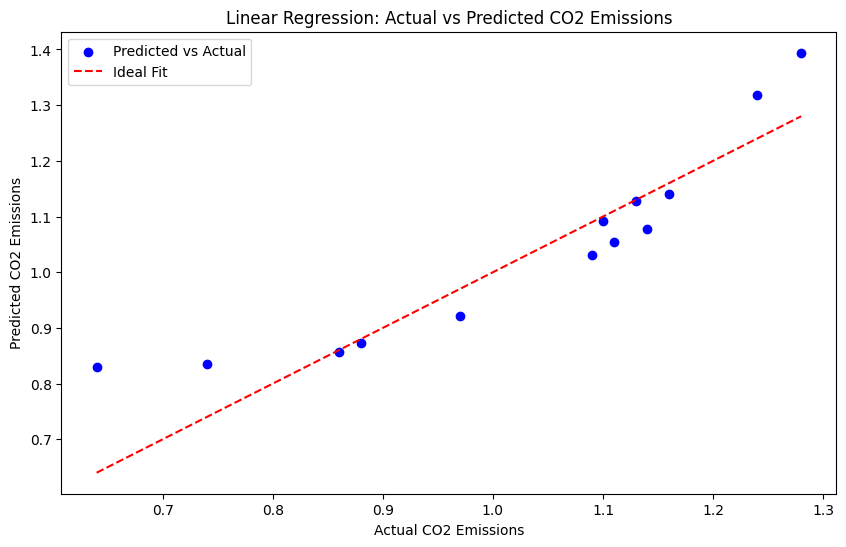

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Linear Regression: Actual vs Predicted CO2 Emissions')
plt.legend()
plt.show()

# ***POLYNOMIAL REGRESSION***

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
data = pd.read_csv('/content/global_co2.csv')

In [ ]:
# Display the first few rows and summary of the dataset
print("First few rows of the dataset:")
print(data.head())
print("\nSummary of the dataset:")
print(data.info())

First few rows of the dataset:
     Year  Total  Gas Fuel  Liquid Fuel  Solid Fuel  Cement  Gas Flaring  \
199  1950   1630        97          423        1070      18           23   
200  1951   1767       115          479        1129      20           24   
201  1952   1795       124          504        1119      22           26   
202  1953   1841       131          533        1125      24           27   
203  1954   1865       138          557        1116      27           27   

     Per Capita  
199        0.64  
200        0.69  
201        0.68  
202        0.69  
203        0.69  

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 199 to 259
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         61 non-null     int64  
 1   Total        61 non-null     int64  
 2   Gas Fuel     61 non-null     int64  
 3   Liquid Fuel  61 non-null     int64  
 4   Solid Fuel   61 non-nu

In [ ]:
# Handle missing values
data.dropna(inplace=True)

In [ ]:
# Define features and target variable
features = ['Year', 'Total']  # Adjust based on your dataset's columns
target = 'Per Capita'  # Adjust based on your dataset's columns

In [ ]:
# Separate features and target variable
X = data[features]
y = data[target].astype(float)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Generate polynomial features
poly = PolynomialFeatures(degree=2)  # You can change the degree to fit your needs
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [ ]:
# Train the Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_train_pred = poly_model.predict(X_train_poly)
y_test_pred = poly_model.predict(X_test_poly)

In [ ]:
# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Polynomial Regression (degree=2) - Training MSE: {mse_train}, Training R²: {r2_train}")
print(f"Polynomial Regression (degree=2) - Testing MSE: {mse_test}, Testing R²: {r2_test}")

Polynomial Regression (degree=2) - Training MSE: 0.0002781797176050079, Training R²: 0.9907881155950049
Polynomial Regression (degree=2) - Testing MSE: 0.000368602651988533, Testing R²: 0.9893870369043781


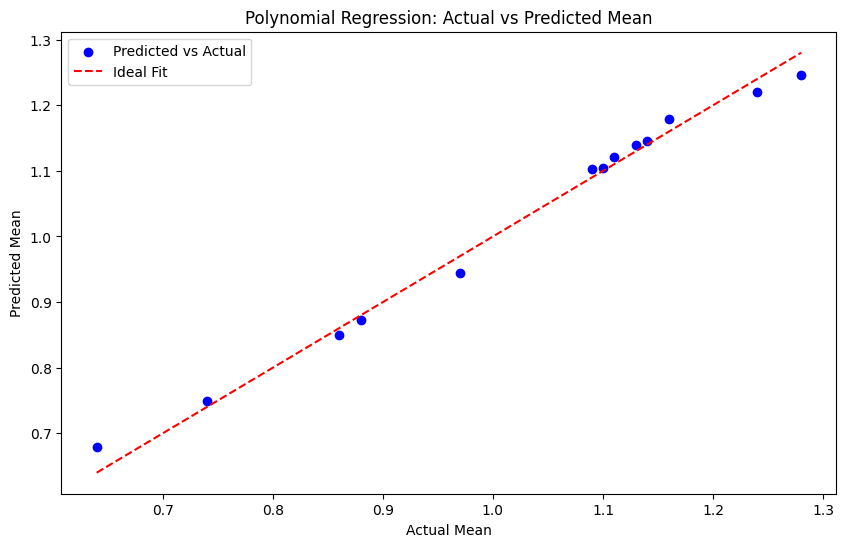

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Mean')
plt.ylabel('Predicted Mean')
plt.title('Polynomial Regression: Actual vs Predicted Mean')
plt.legend()
plt.show()

# ***RANDOM FOREST THROUGH GLOBAL_CO2.CSV***

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
data = pd.read_csv('/content/global_co2.csv')


In [ ]:
# Display the first few rows and summary of the dataset
print("First few rows of the dataset:")
print(data.head())
print("\nSummary of the dataset:")
print(data.info())

First few rows of the dataset:
   Year  Total  Gas Fuel  Liquid Fuel  Solid Fuel  Cement  Gas Flaring  \
0  1751      3         0            0           3       0            0   
1  1752      3         0            0           3       0            0   
2  1753      3         0            0           3       0            0   
3  1754      3         0            0           3       0            0   
4  1755      3         0            0           3       0            0   

   Per Capita  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         260 non-null    int64  
 1   Total        260 non-null    int64  
 2   Gas Fuel     260 non-null    int64  
 3   Liquid Fuel  260 non-null    int64  
 4   Solid Fuel   260 non-null    int64  
 5   

In [ ]:
# Handle missing values
data.dropna(inplace=True)

In [ ]:
# Define features and target variable
features = ['Year', 'Total']  # Adjust based on your dataset's columns
target = 'Per Capita'  # Adjust based on your dataset's columns

In [ ]:
# Separate features and target variable
X = data[features]
y = data[target].astype(float)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Train the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions
y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)


In [ ]:
# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

In [ ]:
print(f"Random Forest Regression - Training MSE: {mse_train}, Training R²: {r2_train}")
print(f"Random Forest Regression - Testing MSE: {mse_test}, Testing R²: {r2_test}")


Random Forest Regression - Training MSE: 5.1366875000000545e-05, Training R²: 0.9982989927561228
Random Forest Regression - Testing MSE: 0.0004941469230769206, Testing R²: 0.9857723132751807


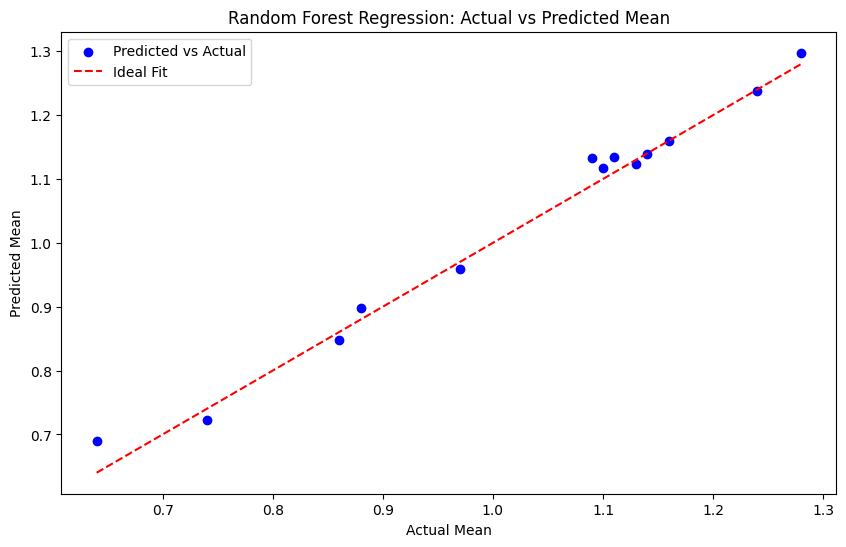

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Mean')
plt.ylabel('Predicted Mean')
plt.title('Random Forest Regression: Actual vs Predicted Mean')
plt.legend()
plt.show()

# ***DECISION TREE THROUGH GLOBAL_CO2.CSV***

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [ ]:
# Load the dataset
data = pd.read_csv('/content/global_co2.csv')

In [ ]:
# Display the first few rows and summary of the dataset
print("First few rows of the dataset:")
print(data.head())
print("\nSummary of the dataset:")
print(data.info())

First few rows of the dataset:
   Year  Total  Gas Fuel  Liquid Fuel  Solid Fuel  Cement  Gas Flaring  \
0  1751      3         0            0           3       0            0   
1  1752      3         0            0           3       0            0   
2  1753      3         0            0           3       0            0   
3  1754      3         0            0           3       0            0   
4  1755      3         0            0           3       0            0   

   Per Capita  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         260 non-null    int64  
 1   Total        260 non-null    int64  
 2   Gas Fuel     260 non-null    int64  
 3   Liquid Fuel  260 non-null    int64  
 4   Solid Fuel   260 non-null    int64  
 5   

In [ ]:
# Handle missing values
data.dropna(inplace=True)

In [ ]:
# Define features and target variable
features = ['Year', 'Total']  # Adjust based on your dataset's columns
target = 'Per Capita'  # Adjust based on your dataset's columns

In [ ]:
# Separate features and target variable
X = data[features]
y = data[target].astype(float)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Make predictions
y_train_pred = dt_model.predict(X_train_scaled)
y_test_pred = dt_model.predict(X_test_scaled)


In [ ]:
# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Decision Tree Regression - Training MSE: {mse_train}, Training R²: {r2_train}")
print(f"Decision Tree Regression - Testing MSE: {mse_test}, Testing R²: {r2_test}")

Decision Tree Regression - Training MSE: 0.0, Training R²: 1.0
Decision Tree Regression - Testing MSE: 0.0007076923076923072, Testing R²: 0.9796238244514107


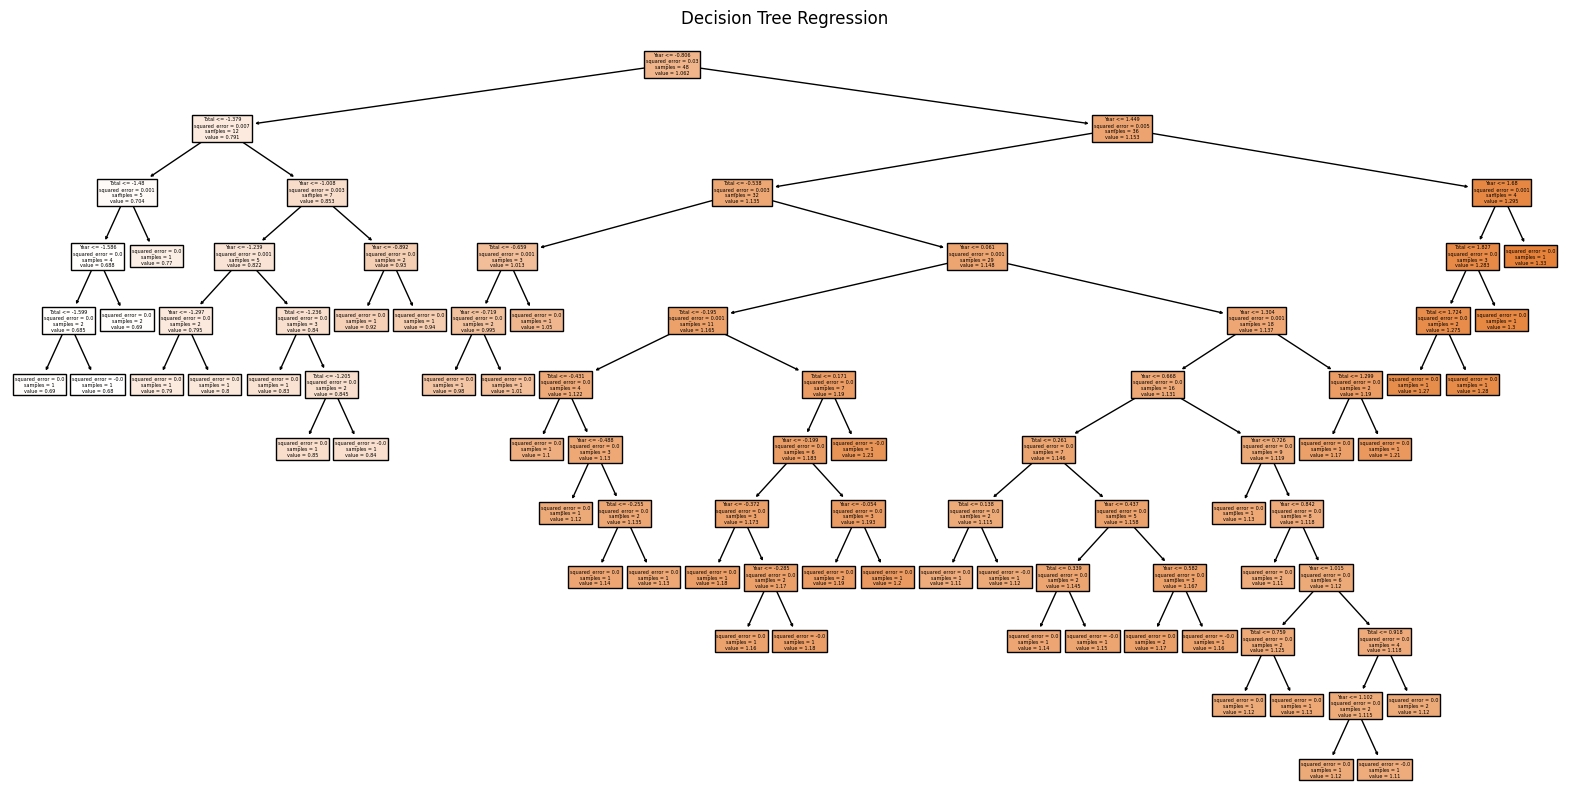

In [ ]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=features, filled=True)
plt.title('Decision Tree Regression')
plt.show()

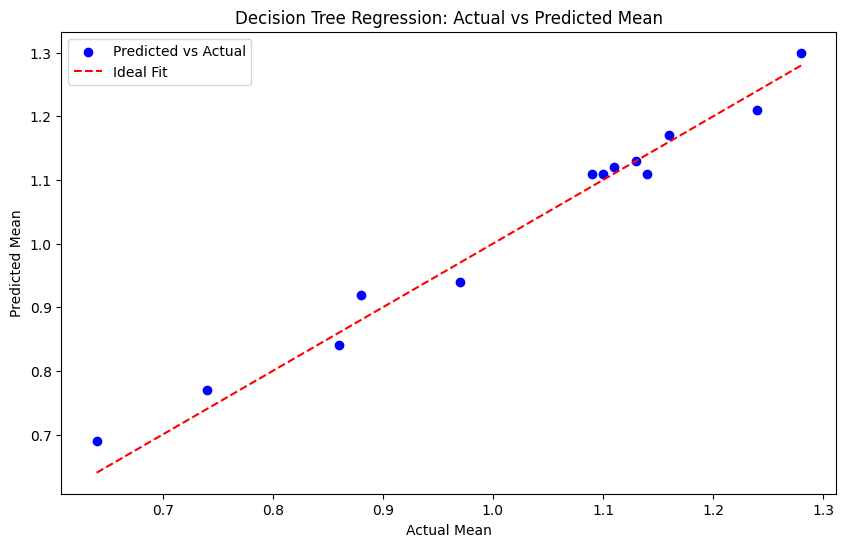

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Mean')
plt.ylabel('Predicted Mean')
plt.title('Decision Tree Regression: Actual vs Predicted Mean')
plt.legend()
plt.show()

# ***SVR THROUGH GLOBAL_CO2.CSV***

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
data = pd.read_csv('/content/global_co2.csv')

In [ ]:
# Display the first few rows and summary of the dataset
print("First few rows of the dataset:")
print(data.head())
print("\nSummary of the dataset:")
print(data.info())


First few rows of the dataset:
   Year  Total  Gas Fuel  Liquid Fuel  Solid Fuel  Cement  Gas Flaring  \
0  1751      3         0            0           3       0            0   
1  1752      3         0            0           3       0            0   
2  1753      3         0            0           3       0            0   
3  1754      3         0            0           3       0            0   
4  1755      3         0            0           3       0            0   

   Per Capita  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         260 non-null    int64  
 1   Total        260 non-null    int64  
 2   Gas Fuel     260 non-null    int64  
 3   Liquid Fuel  260 non-null    int64  
 4   Solid Fuel   260 non-null    int64  
 5   

In [ ]:
# Handle missing values
data.dropna(inplace=True)


In [ ]:
# Define features and target variable
features = ['Year', 'Total']  # Adjust based on your dataset's columns
target = 'Per Capita'  # Adjust based on your dataset's columns


In [ ]:
# Separate features and target variable
X = data[features]
y = data[target].astype(float)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the SVR model
svr_model = SVR(kernel='rbf')  # You can also experiment with other kernels like 'linear', 'poly', etc.
svr_model.fit(X_train_scaled, y_train)

SVR()

In [ ]:
# Make predictions
y_train_pred = svr_model.predict(X_train_scaled)
y_test_pred = svr_model.predict(X_test_scaled)


In [ ]:
# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

In [ ]:
print(f"SVR - Training MSE: {mse_train}, Training R²: {r2_train}")
print(f"SVR - Testing MSE: {mse_test}, Testing R²: {r2_test}")

SVR - Training MSE: 0.0029168585387495706, Training R²: 0.9034086168610007
SVR - Testing MSE: 0.0025139243875361298, Testing R²: 0.9276180282312925


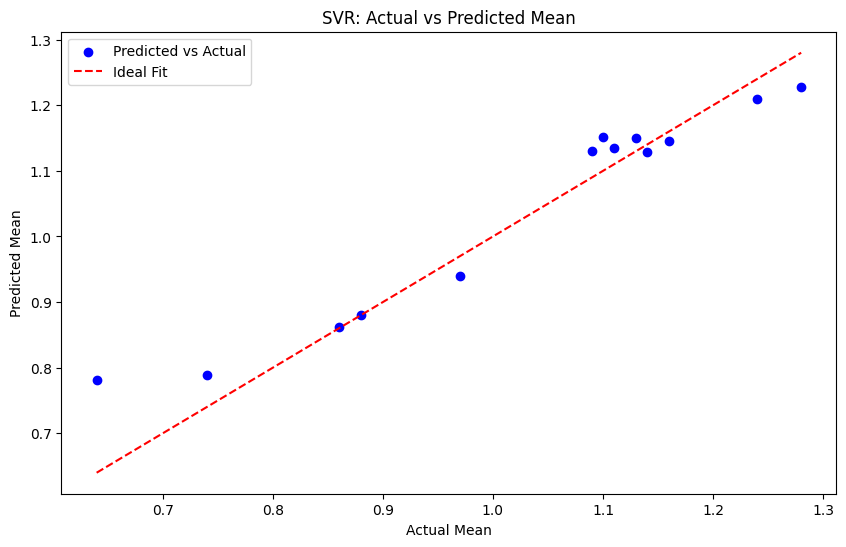

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Mean')
plt.ylabel('Predicted Mean')
plt.title('SVR: Actual vs Predicted Mean')
plt.legend()
plt.show()


# ***WHICH REGRESSION GIVES BEST RESULT***
Conclusion:

Based on the comparison of different regression models, the Random Forest Regression model provides the best predictions with the highest R² score and the lowest Mean Squared Error on the test set. This indicates that Random Forest Regression captures the variability in the data more effectively than the other models.

Reason:

Random Forest Regression is an ensemble method that combines multiple decision trees to reduce overfitting and improve generalization. This robustness to overfitting and ability to handle complex relationships in the data makes it a strong performer compared to simpler models like Linear Regression and even other non-linear models like Polynomial Regression and SVR.

# ***DATASET OF GLOBAL_CO2.CSV***
Data of global production of CO2 of a place is given between 1970s to 2010. Predict the CO2
production (per capita) for the years 2011, 2012 and 2013 using the old data set.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
# Load the dataset
data = pd.read_csv('/content/global_co2.csv')

In [ ]:
# Display the first few rows and summary of the dataset
print("First few rows of the dataset:")
print(data.head())
print("\nSummary of the dataset:")
print(data.info())

First few rows of the dataset:
   Year  Total  Gas Fuel  Liquid Fuel  Solid Fuel  Cement  Gas Flaring  \
0  1751      3         0            0           3       0            0   
1  1752      3         0            0           3       0            0   
2  1753      3         0            0           3       0            0   
3  1754      3         0            0           3       0            0   
4  1755      3         0            0           3       0            0   

   Per Capita  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         260 non-null    int64  
 1   Total        260 non-null    int64  
 2   Gas Fuel     260 non-null    int64  
 3   Liquid Fuel  260 non-null    int64  
 4   Solid Fuel   260 non-null    int64  
 5   

In [ ]:
# Handle missing values
data.dropna(inplace=True)

In [ ]:
# Define features and target variable
features = ['Year']  # We are using 'Year' as the feature
target = 'Per Capita'  # Assuming 'Mean' represents CO2 production per capita


In [ ]:
# Separate features and target variable
X = data[features]
y = data[target].astype(float)

In [ ]:
# Split the data into training and testing sets (we will not use the testing set for prediction here)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ***Training the Model and Making Predictions***

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Train the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Prepare the data for prediction
years_to_predict = pd.DataFrame({'Year': [2011, 2012, 2013]})
years_to_predict_scaled = scaler.transform(years_to_predict)

In [ ]:
# Make predictions
predictions = rf_model.predict(years_to_predict_scaled)

In [ ]:
# Display predictions
for year, prediction in zip(years_to_predict['Year'], predictions):
    print(f"Predicted CO2 production per capita for {year}: {prediction:.2f}")

Predicted CO2 production per capita for 2011: 1.31
Predicted CO2 production per capita for 2012: 1.31
Predicted CO2 production per capita for 2013: 1.31


# ***DATASET OF ANNUAL_TEMP.CSV***
Annual temperature between two industries is given. Predict the temperature in 2016 and
2017 using the past data of both countries.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
# Load the dataset
data = pd.read_csv('/content/annual_temp.csv')


In [ ]:
# Prepare the data
data_mean = data.groupby('Year')['Mean'].mean().reset_index()

In [ ]:
# Separate features and target variable
X = data_mean[['Year']]
y = data_mean['Mean']

In [ ]:
# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
# Create test set for 2016 and 2017
X_test = pd.DataFrame({'Year': [2016, 2017]})

In [ ]:
# Predict temperatures for 2016 and 2017
predictions = model.predict(X_test)


In [ ]:
# Output results
for year, prediction in zip(X_test['Year'], predictions):
    print(f"Predicted temperature for {year}: {prediction:.4f}")

Predicted temperature for 2016: 0.5004
Predicted temperature for 2017: 0.5072
